/home/devluis/Documentos/GitHub/VVC_research/source/vvc_log.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['bd_rate'][ind] = bdbr
/home/devluis/Documentos/GitHub/VVC_research/source/vvc_log.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['bd_rate'][ind] = bdbr
/tmp/ipykernel_9711/1895140088.py:43: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sdata = pd.Series(bd_rate, index=indices, name='bd_rate')
/tmp/ipykernel_9711/1895140088.py:43: DeprecationWarning: The default dt

4x4-1-8x8-2      0.155461
4x4-3-8x8-SAD    0.188664
4x4-3           -0.004487
4x4-1-8x8-SAD    0.207886
8x8-3            0.134578
8x8-1            0.084040
4x4-1-8x8-1      0.155461
8x8-SAD          0.199105
4x4-1-8x8-3      0.155461
4x4-2-8x8-4      0.155461
8x8-2            0.112892
4x4-1-8x8-2      0.920987
4x4-3-8x8-SAD    0.570485
4x4-3           -0.077644
4x4-1-8x8-SAD    0.632967
8x8-3            0.649001
8x8-1            0.270343
4x4-1-8x8-1      0.920987
8x8-SAD          0.600326
4x4-1-8x8-3      0.920987
8x8-2            0.509534
4x4-3-8x8-SAD    0.738177
4x4-3            0.024238
4x4-1-8x8-SAD    0.662754
8x8-3            0.582744
8x8-1            0.243411
4x4-1-8x8-1      0.538079
8x8-SAD          0.512459
4x4-1-8x8-3      0.538079
8x8-2            0.094322
Name: bd_rate, dtype: float64

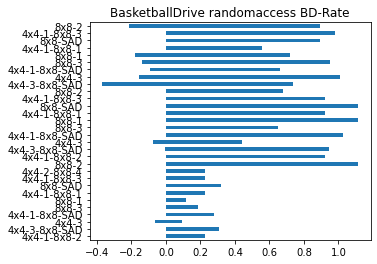

In [25]:
# This python notebook calculates and generates the bd-rate associated to each video using each of the encoder configurations:
# example:
    # BasketballPass_intra:
        # satd              ,bd_rate
        # 4x4-1-8x8-2.cpp   ,0.15546061684901247
        # 4x4-3-8x8-SAD.cpp ,0.18866377076178775
        # 4x4-3.cpp         ,-0.004486946842852113
        # 4x4-1-8x8-SAD     ,0.20788606221586736
        # 8x8-3             ,0.13457760135215935

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vvc_log as vl
import os

satds = [dir for dir in os.listdir('../outcsv') if os.path.isdir(os.path.join('../outcsv', dir))]
videos = [video for video in os.listdir('../out_preciso/Preciso/') if os.path.isdir(os.path.join('../out_preciso/Preciso', video))]
cfgs1 = ['intra', 'lowdelay', 'randomaccess']
cfgs2 = ['intra', 'low_delay', 'random_access']

for video in videos:
    files = []
    for i in range(len(cfgs1)):
        bd_rate = []
        indices = []

        for satd in satds:
            file1 = f'../out_preciso/Preciso/{video}/{cfgs2[i]}/Preciso{cfgs2[i]}{video}.csv'
            file2 = f'../outcsv/{satd}/csv/{cfgs1[i]}/{video}.csv'
            if not os.path.isfile(file1) or not os.path.isfile(file2):
                continue
            else:
                files.append((file2, file1))

        for file in files:
            try:
                temp = vl.LogDF(file[0], file[1])
                bd_rate.append(temp.df['bd_rate'][0])
                indices.append(temp.df['satd'][0].removesuffix('.cpp'))
            except:
                continue
        sdata = pd.Series(bd_rate, index=indices, name='bd_rate')
        cfg = cfgs1[i]
        sdata.to_csv(f'../out_bd_rate/csv/bdr_{video}_{cfg}.csv')
        sdata.to_excel(f'../out_bd_rate/excel/bdr_{video}_{cfg}.xlsx')
        
        try:
            t = sdata.plot.barh(
                title=f'{video} {cfg} BD-Rate'
            )
            plt.subplots_adjust(left=0.25)
            plt.savefig(f'../out_bd_rate/plot/bdr_{video}_{cfg}.jpeg')

        except:
            continue

        
sdata
    


